<a href="https://colab.research.google.com/github/JonChanGit/d2l-zh/blob/master/chapter_recurrent-neural-networks/experiment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install d2l

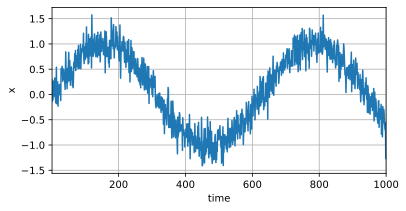

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

T = 1000
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

Â∞ÜÊï∞ÊçÆÊò†Â∞Ñ‰∏∫Êï∞ÊçÆÂØπ ùë¶ùë°=ùë•ùë° Âíå ùê±ùë°=[ùë•ùë°‚àíùúè,‚Ä¶,ùë•ùë°‚àí1]


In [3]:
# ËÆæÁΩÆÊó∂Èó¥ÊªûÂêéÔºàtauÔºâ‰∏∫4ÔºåÊÑèÂë≥ÁùÄÊàë‰ª¨Áî®ËøáÂéªÁöÑ4‰∏™Êó∂Èó¥ÁÇπÁöÑÂÄºÊù•È¢ÑÊµãÂΩìÂâçÊó∂Èó¥ÁÇπÁöÑÂÄº„ÄÇ
tau = 4
features = torch.zeros((T - tau, tau))
for i in range(tau):
  # ÂØπ‰∫éÊØè‰∏™Êó∂Èó¥ÁÇπÔºåÈÉΩÈÄâÊã©ÂÖ∂Ââçtau‰∏™Êó∂Èó¥ÁÇπÁöÑÂÄºÔºå‰Ωú‰∏∫ËØ•Êó∂Èó¥ÁÇπÁöÑÁâπÂæÅ„ÄÇ
  features[:, i] = x[i:T - tau + i]
# ÊâÄÊúâ‰ªétauÂºÄÂßãÂà∞Êú´Â∞æÁöÑÂÄº‰Ωú‰∏∫Ê†áÁ≠æ„ÄÇÂ∞ÜÊØè‰∏™Ê†áÁ≠æÈÉΩË∞ÉÊï¥‰∏∫‰∏Ä‰∏™ÂΩ¢Áä∂‰∏∫(-1, 1)ÁöÑ‰∫åÁª¥Âº†Èáè„ÄÇ torch.Size([996, 1])
labels = x[tau:].reshape((-1, 1))

batch_size, n_train = 16, 600
train_iter = d2l.load_array((features[:n_train], labels[:n_train]),
                            batch_size, is_train=True)

In [4]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

def get_net():
    net = nn.Sequential(nn.Linear(4, 10), nn.ReLU(), nn.Linear(10, 1))
    net.apply(init_weights)
    return net

loss = nn.MSELoss()

In [5]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            trainer.step()
        print(f'epoch {epoch + 1}, '
              f'loss: {d2l.evaluate_loss(net, train_iter, loss):f}')

net = get_net()
train(net, train_iter, loss, 5, 0.01)

epoch 1, loss: 0.058961
epoch 2, loss: 0.056240
epoch 3, loss: 0.055158
epoch 4, loss: 0.052754
epoch 5, loss: 0.053978


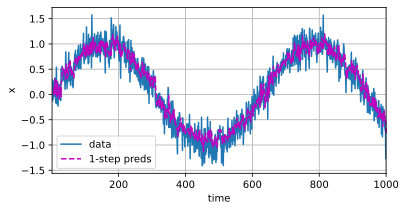

In [6]:
onestep_preds = net(features)
d2l.plot(
    [time, time[tau:]],
    [x.detach().numpy(), onestep_preds.detach().numpy()], 'time', 'x',
    legend=['data', '1-step preds'], xlim=[1, 1000], figsize=(6, 3))

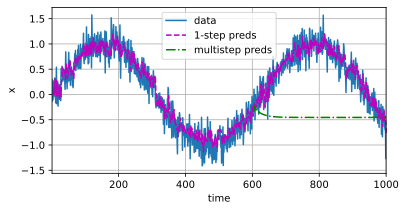

In [7]:
multistep_preds = torch.zeros(T)
multistep_preds[:n_train + tau] = x[:n_train + tau]
for i in range(n_train + tau, T):
    multistep_preds[i] = net(multistep_preds[i - tau:i].reshape((1, -1)))

d2l.plot([time, time[tau:], time[n_train + tau:]], [
    x.detach().numpy(),
    onestep_preds.detach().numpy(),
    multistep_preds[n_train + tau:].detach().numpy()], 'time', 'x',
         legend=['data', '1-step preds',
                 'multistep preds'], xlim=[1, 1000], figsize=(6, 3))

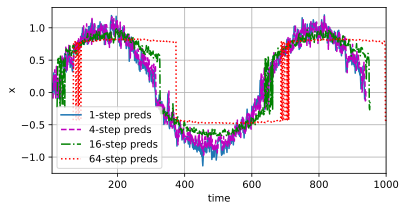

In [8]:
max_steps = 64

features = torch.zeros((T - tau - max_steps + 1, tau + max_steps))
for i in range(tau):
    features[:, i] = x[i:i + T - tau - max_steps + 1]

for i in range(tau, tau + max_steps):
    features[:, i] = net(features[:, i - tau:i]).reshape(-1)

steps = (1, 4, 16, 64)
d2l.plot([time[tau + i - 1:T - max_steps + i] for i in steps],
         [features[:, (tau + i - 1)].detach().numpy() for i in steps], 'time',
         'x', legend=[f'{i}-step preds'
                      for i in steps], xlim=[5, 1000], figsize=(6, 3))